In [1]:
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
dataset = pd.read_excel('Jupyter test.xlsx')
dataset.shape

(301, 2)

In [4]:
dataset.head()

,Price,Distance
0,37.9,84.87882
1,42.2,306.59470
2,47.3,561.98450
3,54.8,561.98450
4,43.1,390.56840


In [5]:
Pr = dataset.Price
Dt = dataset.Distance

In [6]:
sns.set_style('darkgrid')

## Estimation par histogramme

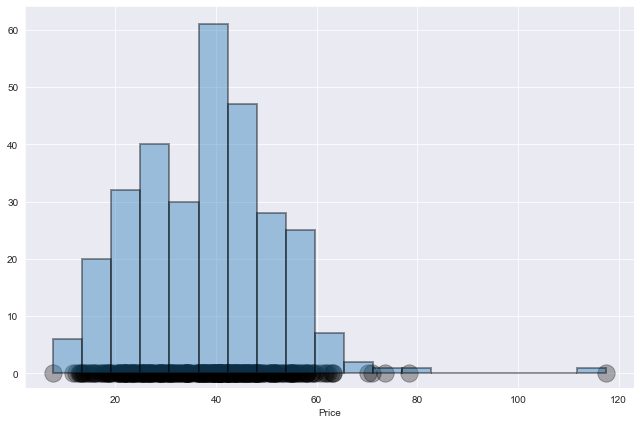

In [7]:
plt.figure(figsize=(9,6))

plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha = 0.3, c='k')
sns.distplot(Pr, hist_kws=dict(edgecolor="k", linewidth=2), kde=False)

plt.ylim(-2.5,)
plt.tight_layout();

## Estimation à noyau
### le noyau est gaussien par défaut 

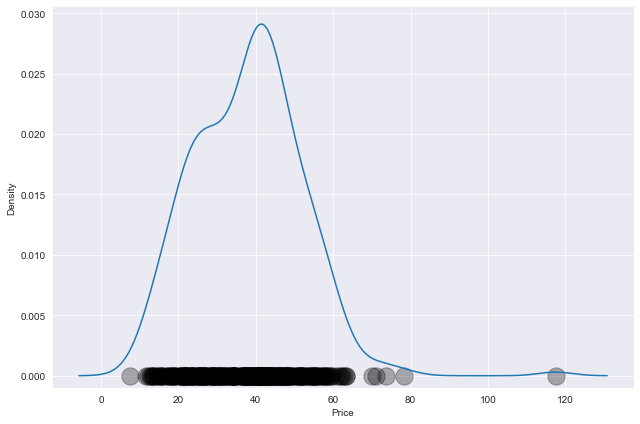

In [8]:
plt.figure(figsize=(9,6))

sns.kdeplot(Pr)
plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha = 0.3, c='k')

plt.ylim(-1e-3,)
plt.tight_layout();

## Changement de h (bandwidth)

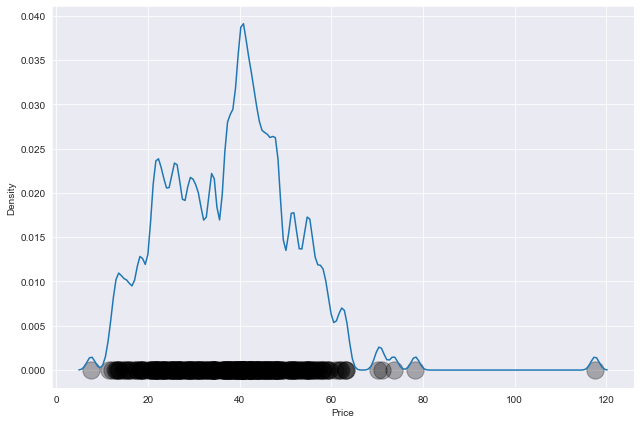

In [9]:
plt.figure(figsize=(9,6))

sns.kdeplot(Pr, bw_adjust=.2);
plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha = 0.3, c='k')

plt.ylim(-0.002,)
plt.tight_layout();

## Estimation par histogramme et à noyau 

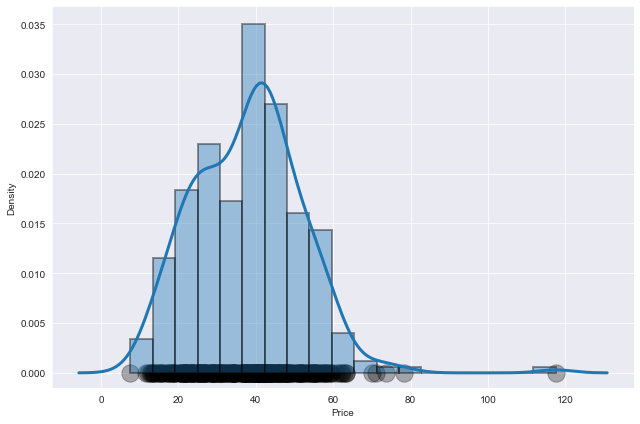

In [10]:
plt.figure(figsize=(9,6))

sns.distplot(Pr, kde_kws={"lw": 3}, hist_kws=dict(edgecolor="k", linewidth=2))
plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha = 0.3, c='k')

plt.ylim(-0.0015,)
plt.tight_layout();

In [11]:
def computed_kde(data, width=2, gridsize=1000, normalized=True, bounds=None):
    
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) -3 * width
        xmax = max(data) -3 * width

    x = np.linspace(xmin, xmax, gridsize)

    kde = np.zeros(gridsize)
    for val in data:
        kde += norm.pdf(x, loc=val, scale=width)
    kde /= len(data)

    return x, kde

In [12]:
x, kde = computed_kde(Pr, gridsize=1000)

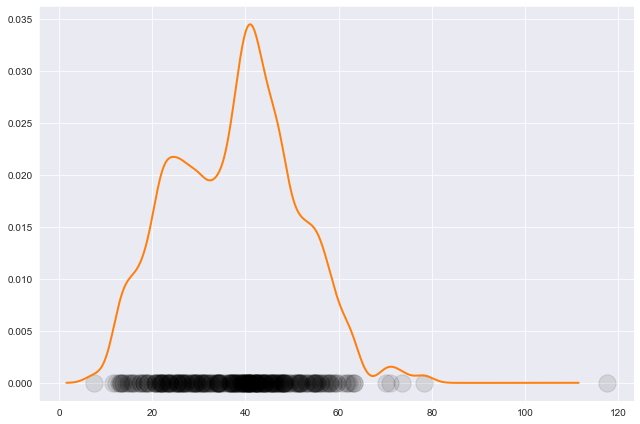

In [13]:
plt.figure(figsize=(9,6))

plt.plot(x, kde, lw = 2, color='C1', label="calculated kde")
plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha=.1, c='k', label="sample")

plt.ylim()
plt.tight_layout()

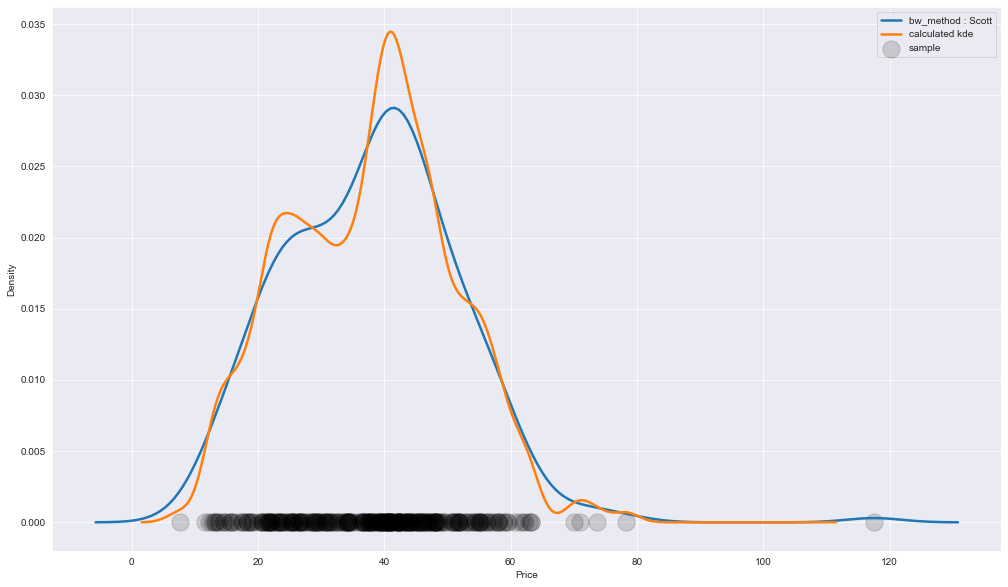

In [14]:
plt.figure(figsize=(17,10))

sns.kdeplot(Pr, lw = 2.5, bw_method="scott", label="bw_method : Scott")
plt.plot(x, kde, lw = 2.5, label="calculated kde")
plt.scatter(Pr, np.zeros_like(Pr), s=300, marker='o', alpha=.15, c='k', label="sample")

plt.ylim(-.002)
plt.legend();